<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Connect to Db2 database on Cloud using Python

Estimated time needed: **15** minutes

## Objectives

After completing this lab you will be able to:

*   Import the ibm_db Python library
*   Enter the database connection credentials
*   Create the database connection
*   Close the database connection


**Note:** Please follow the instructions given in the first Lab of this course to Create a database service instance of Db2 on Cloud and retrieve your database Service Credentials.

## Import the `ibm_db` Python library

The `ibm_db` [API ](https://pypi.python.org/pypi/ibm_db/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01) provides a variety of useful Python functions for accessing and manipulating data in an IBM® data server database, including functions for connecting to a database, preparing and issuing SQL statements, fetching rows from result sets, calling stored procedures, committing and rolling back transactions, handling errors, and retrieving metadata.

We first import the ibm_db library into our Python Application

Execute the following cell by clicking within it and then
press `Shift` and `Enter` keys simultaneously


In [ ]:
!pip install --force-reinstall ibm_db==3.1.0 ibm_db_sa==0.3.7

In [ ]:
import ibm_db

When the command above completes, the `ibm_db` library is loaded in your notebook.

## Identify the database connection credentials

Connecting to dashDB or DB2 database requires the following information:

*   Driver Name
*   Database name
*   Host DNS name or IP address
*   Host port
*   Connection protocol
*   User ID (or username)
*   User Password

**Notice:** To obtain credentials please refer to the instructions given in the first Lab of this course

Now enter your database credentials below and execute the cell with `Shift` + `Enter`


In [ ]:
#Replace the placeholder values with your actual Db2 hostname, username, and password:
dsn_hostname = "YourDb2Hostname" # e.g.: "54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud"
dsn_uid = "YourDb2Username"        # e.g. "abc12345"
dsn_pwd = "YoueDb2Password"      # e.g. "7dBZ3wWt9XN6$o0J"

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"            # e.g. "BLUDB"
dsn_port = "YourPort"                # e.g. "32733" 
dsn_protocol = "TCPIP"            # i.e. "TCPIP"
dsn_security = "SSL"              #i.e. "SSL"

## Create the DB2 database connection

Ibm_db API uses the IBM Data Server Driver for ODBC and CLI APIs to connect to IBM DB2 and Informix.

Lets build the dsn connection string using the credentials you entered above


In [ ]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create the dsn connection string
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};"
    "SECURITY={7};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd,dsn_security)

#print the connection string to check correct values are specified
print(dsn)

Now establish the connection to the database


In [ ]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create database connection

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )


Congratulations if you were able to connect successfuly. Otherwise check the error and try again.


In [ ]:
#Retrieve Metadata for the Database Server
server = ibm_db.server_info(conn)

print ("DBMS_NAME: ", server.DBMS_NAME)
print ("DBMS_VER:  ", server.DBMS_VER)
print ("DB_NAME:   ", server.DB_NAME)

In [ ]:
#Retrieve Metadata for the Database Client / Driver
client = ibm_db.client_info(conn)

print ("DRIVER_NAME:          ", client.DRIVER_NAME) 
print ("DRIVER_VER:           ", client.DRIVER_VER)
print ("DATA_SOURCE_NAME:     ", client.DATA_SOURCE_NAME)
print ("DRIVER_ODBC_VER:      ", client.DRIVER_ODBC_VER)
print ("ODBC_VER:             ", client.ODBC_VER)
print ("ODBC_SQL_CONFORMANCE: ", client.ODBC_SQL_CONFORMANCE)
print ("APPL_CODEPAGE:        ", client.APPL_CODEPAGE)
print ("CONN_CODEPAGE:        ", client.CONN_CODEPAGE)

## Close the Connection

We free all resources by closing the connection. Remember that it is always important to close connections so that we can avoid unused connections taking up resources.


In [ ]:
ibm_db.close(conn)

## Summary

In this tutorial you established a connection to a DB2 database on Cloud database from a Python notebook using ibm_db API.


## Author

<a href="https://www.linkedin.com/in/ravahuja?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01">Rav Ahuja</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                 |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 2021-11-17        | 2.2     | Lakshmi    | Updated library                    |
| 2021-07-09        | 2.1     | Malika     | Updated the connection string      |
| 2020-08-28        | 2.0     | Lavanya    | Moved lab to course repo in GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>


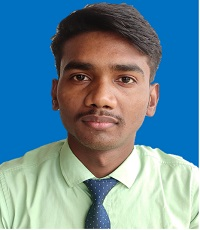